# Analiza danych i predykcja mocy pewnej instalacji produkcyjnej

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 

**Wczytanie i wstępne poznanie danych**

In [2]:
df = pd.read_csv('df_task_final.csv')

In [3]:
df.sample(5)

,Timestamp,P1,T1,T2,Ta1,Ta3,Ta4,Ta5,Ta6,Ta7,Ta8,Ta_q,v_1,power
6435,2004-02-14 11:15:00,-141.476300,1551.91314,1551.69648,1008.007054,1057.753458,"1064,950601",996.241445,1032.579125,1072.128962,1078.082390,382.894682,M,938.67742
25784,2004-02-27 21:44:00,-157.749664,1541.48206,1540.57146,1017.080080,-274.000000,"1082,637",1014.188140,1052.439620,1089.369160,1094.346060,384.606138,M,777.46354
1207,2004-02-10 20:07:00,-159.807620,1549.87842,1550.00716,971.167345,1010.213237,"1028,544214",959.830074,972.666626,1017.005998,1024.658790,400.950141,M,770.78162
11618,2004-02-18 01:38:00,-182.225964,1541.42554,1542.00330,943.657177,947.343860,"991,4667627",935.339646,971.067783,1007.036824,1013.528118,404.001077,S,554.88150
10793,2004-02-17 11:53:00,-126.123584,1553.39836,1553.64014,1009.952593,1043.058281,"1061,51201",995.113870,1034.813577,1071.733396,1076.399987,415.477888,M,1078.20018


In [4]:
df.describe()

,P1,T1,T2,Ta1,Ta3,Ta5,Ta6,Ta7,Ta8,Ta_q,power
count,30231.000000,30219.000000,30241.000000,30132.000000,30171.000000,30168.000000,30157.000000,30168.000000,30168.000000,30169.000000,30241.000000
mean,-145.508880,1527.588187,1527.133659,982.886298,781.369002,968.200036,1006.890481,1042.791981,1047.313660,387.214772,887.202106
std,27.085915,122.844911,124.735997,83.982212,496.127352,87.296461,90.686632,94.075705,94.474558,17.942195,278.178419
min,-274.000000,-110.862870,-274.000000,181.534245,-274.000000,168.972999,187.873896,191.665459,192.628790,304.668752,-275.596991
25%,-154.417653,1544.319050,1544.056860,985.318954,893.381530,970.444871,1009.863380,1046.007350,1050.659639,378.854131,815.448120
50%,-136.172526,1551.360500,1551.128140,1003.243992,1029.130760,987.941021,1027.707756,1064.701148,1069.277540,390.051792,982.555780
75%,-126.046183,1553.505120,1553.348120,1013.962254,1051.123936,1001.758197,1039.923580,1077.883048,1082.633536,399.329667,1075.681900
max,-120.431392,1561.094500,1560.400560,1049.356488,1106.053860,1042.309980,1079.600620,1116.866140,1119.095540,434.849707,1120.998380


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30241 entries, 0 to 30240
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  30241 non-null  object 
 1   P1         30231 non-null  float64
 2   T1         30219 non-null  float64
 3   T2         30241 non-null  float64
 4   Ta1        30132 non-null  float64
 5   Ta3        30171 non-null  float64
 6   Ta4        30129 non-null  object 
 7   Ta5        30168 non-null  float64
 8   Ta6        30157 non-null  float64
 9   Ta7        30168 non-null  float64
 10  Ta8        30168 non-null  float64
 11  Ta_q       30169 non-null  float64
 12  v_1        30241 non-null  object 
 13  power      30241 non-null  float64
dtypes: float64(11), object(3)
memory usage: 3.2+ MB


In [6]:
df.isna().sum(0)

Timestamp      0
P1            10
T1            22
T2             0
Ta1          109
Ta3           70
Ta4          112
Ta5           73
Ta6           84
Ta7           73
Ta8           73
Ta_q          72
v_1            0
power          0
dtype: int64

In [7]:
# zmienna Ta4 ma dane numeryczne z przecinkami, nalezy ja poprawic
df['Ta4']

0        183,5510776
1        184,3680832
2        185,1172925
3        186,0627518
4        186,6565326
            ...     
30236       962,2494
30237      963,10348
30238      968,44148
30239      974,74974
30240      980,48338
Name: Ta4, Length: 30241, dtype: object

In [8]:
df['Ta4'] =df['Ta4'].str.replace(",",".")
df['Ta4'] = df['Ta4'].astype('float')
df['Ta4']

0        183.551078
1        184.368083
2        185.117292
3        186.062752
4        186.656533
            ...    
30236    962.249400
30237    963.103480
30238    968.441480
30239    974.749740
30240    980.483380
Name: Ta4, Length: 30241, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30241 entries, 0 to 30240
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  30241 non-null  object 
 1   P1         30231 non-null  float64
 2   T1         30219 non-null  float64
 3   T2         30241 non-null  float64
 4   Ta1        30132 non-null  float64
 5   Ta3        30171 non-null  float64
 6   Ta4        30129 non-null  float64
 7   Ta5        30168 non-null  float64
 8   Ta6        30157 non-null  float64
 9   Ta7        30168 non-null  float64
 10  Ta8        30168 non-null  float64
 11  Ta_q       30169 non-null  float64
 12  v_1        30241 non-null  object 
 13  power      30241 non-null  float64
dtypes: float64(12), object(2)
memory usage: 3.2+ MB


In [10]:
df['v_1'].value_counts()

M      22905
S       4891
L       1962
low      483
Name: v_1, dtype: int64

**EDA (eksploracyjna analiza danych)**


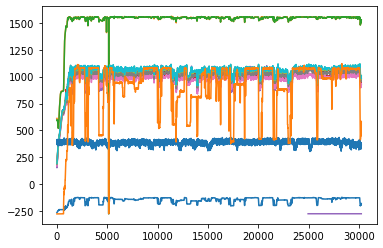

In [11]:
#prezentacja zakresu wartosci, jakie osiagaja zmienne numeryczne
_=plt.plot(df.select_dtypes(include = 'float64'))

In [12]:
# pomocnicza zmienna, samych kolumn numerycznych
floaty = df.select_dtypes(include = 'float64')

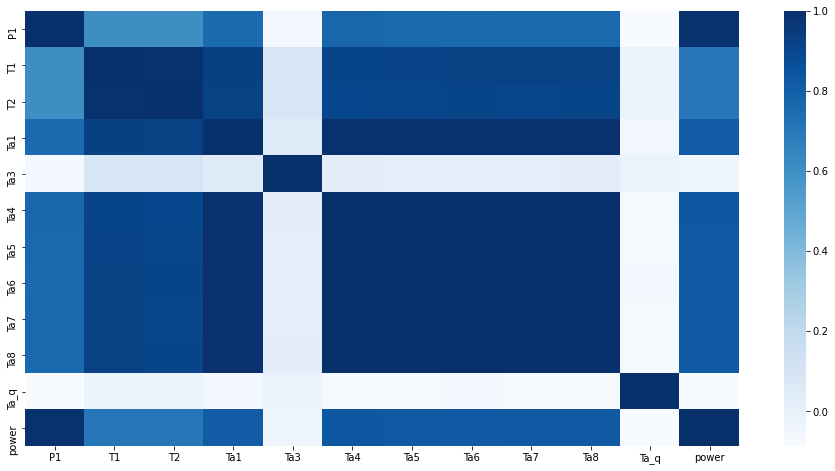

In [13]:
# heatmapa prezentujac korelacje miedzy zmiennymi
plt.figure(figsize = (16,8))
_ = sb.heatmap(floaty.corr(),cmap="Blues")

Badając korelacje zmiennej power i pozostałych zmiennych dotyczących temperatur lub ciesnienia, możemy zauważyć, że im wyższa moc tym wym wyższe cisnienie oraz tym wyższe temperatury  (dodatnia korelacja), z wyjątkiem zmiennych Ta3 oraz Ta_q.
Na te dwie zmienne nie ma wpływu moc pewnej instalacji.

In [14]:
# parsowanie zmiennej na format datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# dodatkowa zmienna - godzina
df1 = df.copy()
df1['hour'] = df1['Timestamp'].dt.hour

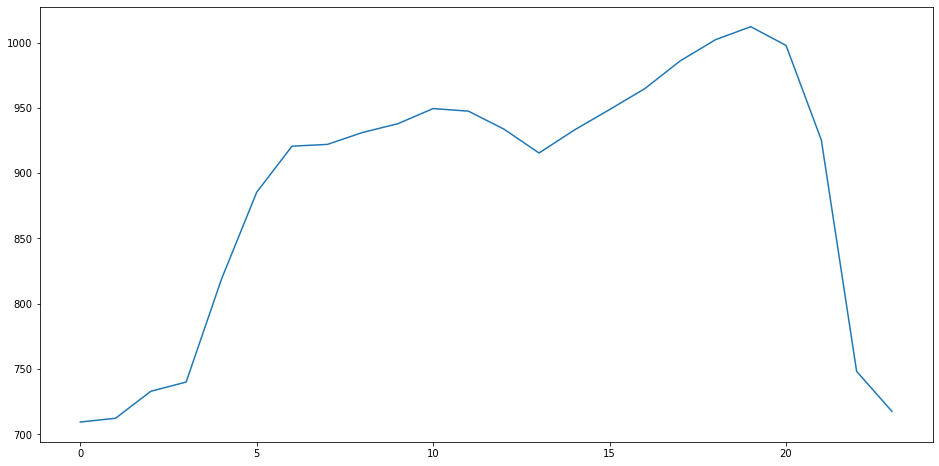

In [15]:
# moc systemu w przekroju godzinowym
plt.figure(figsize = (16,8))
_=plt.plot(df1[['power','hour']].groupby(['hour']).mean())

Możemy zauważyć, że pewna instalacja najwyższe moce systemu osiąga w godzinach popołudniowych.  
Dostrzegalne są spadki w okolicach godziny 13/14 kiedy prawdopodobnie nastepuję koniec zmiany oraz miedzy godziną 22 a 4, prawdopodobnie wtedy jest przerwa nocna lub mniej liczna zmiana.

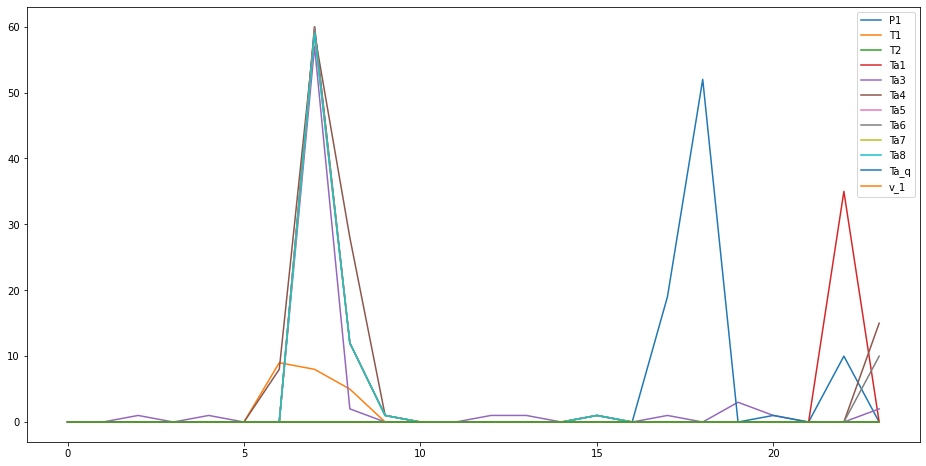

In [16]:
# kiedy wystapuja braki danych
NA_kalkulacja = df1.iloc[:,[-1]].join(df1.iloc[:,1:-1].isna()*1)
plt.figure(figsize = (16,8))
plot = plt.plot(NA_kalkulacja.groupby(['hour']).sum())
_ = plt.legend(plot, NA_kalkulacja.columns[1:-1])

Jak widzimy najwięcej problemów z danymi (Nan) występuje w godzinach miedzy 7 a 8 rano oraz w okolicach 22. 
Może być to spowodowane rozkojażeniem pracowników na początku dnia i na koniec zmiany wieczornej.

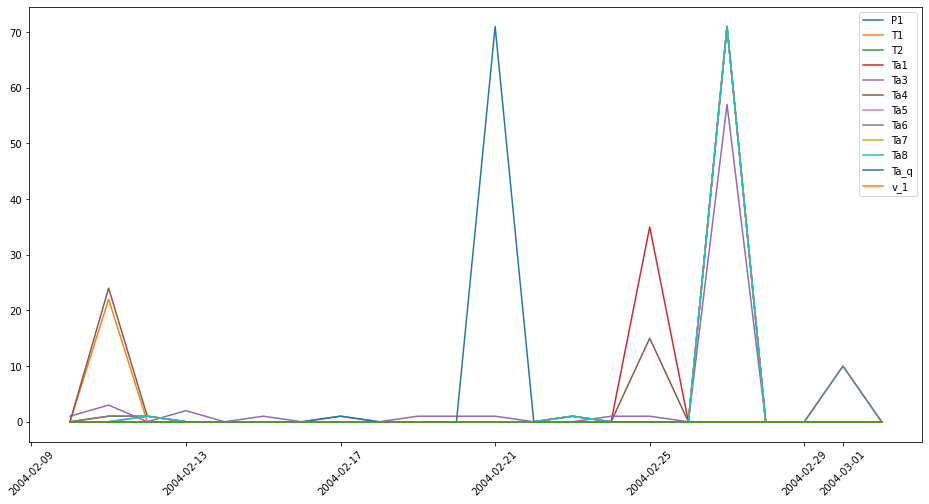

In [17]:
# sprawdzmy jeszcze czy jest ich wiecej w jakis konkretny dzien
df1['day'] = df['Timestamp'].dt.date

# kiedy wystapuja braki danych
NA_kalkulacja_day = df1.iloc[:,[-1]].join(df1.iloc[:,1:-2].isna()*1)
plt.figure(figsize = (16,8))
plot = plt.plot(NA_kalkulacja_day.groupby(['day']).sum())
plt.xticks(rotation=45)
_ = plt.legend(plot, NA_kalkulacja_day.columns[1:-1])

Widzimy, ze najwiecej problemow z danymi było 21.02, oraz 27.02

**Wybor najlepszego modelu predykcyjnego**

In [18]:
# pierwszy krok to feature enginering aby uzyskac zmienne targetowa dla predykcji oraz dodatkowo dane za dzien poprzedni
data = df[['Timestamp','power']]
data['power_1min_wczesniej'] = data['power'].shift(periods = 1)
data['power_1dzien_wczesniej'] = data['power'].shift(periods = 60*24)

# powstaly nam wartosci NA dla pierwszego dnia w zbiorze, usunmy je, wiec:
data = data.dropna()

<ipython-input-18-ea80dbb8653c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['power_1min_wczesniej'] = data['power'].shift(periods = 1)
<ipython-input-18-ea80dbb8653c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['power_1dzien_wczesniej'] = data['power'].shift(periods = 60*24)


In [19]:
# podział zbioru na dane testowe i treningowe
test_size = 60*24 # 1 pelen dzien

X_train = data.drop(columns = ['Timestamp','power']).iloc[:data.shape[0]-test_size,:]
X_test = data.drop(columns = ['Timestamp','power']).iloc[data.shape[0]-test_size:,:]

Y_train = data['power'].iloc[:data.shape[0]-test_size]
Y_test = data['power'].iloc[data.shape[0]-test_size:]

In [20]:
# porownanie kilku prostych modeli 
model1 =  LinearRegression()
model2 = KNeighborsRegressor()
model3 = RandomForestRegressor(n_estimators=10)
model4 = SVR()
models = [model1, model2, model3, model4]

tscv = TimeSeriesSplit(n_splits = 5)
results = []
for i,model_n in enumerate(models):
    model =model_n.fit(X_train , Y_train)
    cv_result = cross_val_score(model, X_train,Y_train, cv = tscv, scoring = 'r2')
    MSE_result = mean_absolute_error
    results.append(cv_result)
    
    Y_pred = model.predict(X_test)
    blad = mean_absolute_error(Y_test, Y_pred)
    print("model",i+1,"\n", 'r2 =', round(cv_result.mean(),3), 'MAE =', round(blad,3))

model  1 
 r2 = 0.999 MAE = 0.983
model  2 
 r2 = 0.995 MAE = 1.691
model  3 
 r2 = 0.993 MAE = 1.284
model  4 
 r2 = 0.987 MAE = 1.877


Najlepsze wyniki współczynnika R2 przy cross walidacji osiągnął prosty model regresji liniowej, skorzystajmy z niego przy dalszych wyliczeniach


In [23]:
# regresja liniowa
model = LinearRegression()
model.fit(X_train , Y_train)

Y_pred = model.predict(X_test)

blad = mean_absolute_error(Y_test, Y_pred)
print(f"Nasza predykcja różni się średnio od wartości rzeczywistej o {blad:.2}".format(blad))

Nasza predykcja różni się średnio od wartości rzeczywistej o 0.98


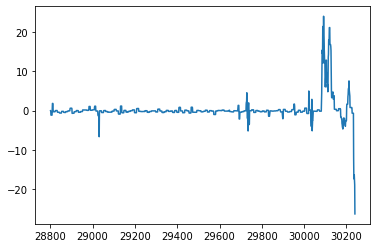

In [24]:
# jak wygladaja nasze predykcje w stosunku do rzeczywistych wartosci.
reszty = Y_pred - Y_test
_ = plt.plot(reszty)

**Predykcja przyszłych wartości**

In [25]:
# predykcja kolejnego okresu 
def predykcja_mocy(ostatni_dzien, n_okresow):
    '''
    ostatni_dzien - wartosci z ostatnIch dwoch dni lub z ostatnich 2880 okresow minutowych, w postarci dataseries
    n_okresow - na ile okresow dokonac predykcji (ile minut)
    '''
    # obrobka danych załączonych przez użytkownika do formatu wymaganego przez model
    wartosci = ostatni_dzien.to_frame()
    wartosci['power_1min_wczesniej'] = wartosci['power'].shift(periods = 1)
    wartosci['power_1dzien_wczesniej'] = wartosci['power'].shift(periods = 60*24)
    wartosci = wartosci[['power_1min_wczesniej','power_1dzien_wczesniej']].dropna()
    
    predykcje = []
    
    for _ in range(n_okresow):
        # ostatni wiersz zbioru zalaczonego przez uzytkownika
        ostatnia_wartosc = wartosci.iloc[-1:,:]
        
        # predykcja 1 przyszlej wartosci
        predykcja = model.predict(ostatnia_wartosc)
        
        # uzupelnienie zbioru do kolejnych predykcji, kolejny wiersz danych
        to_append = [predykcja[0], wartosci['power_1min_wczesniej'].shift(periods = 60*24-1).to_frame().iloc[-1,:][0]]
        a_series = pd.Series(to_append, index = wartosci.columns)
        wartosci = wartosci.append(a_series, ignore_index=True).iloc[-1440:]
        
        # zbior predykcji    
        predykcje.append(predykcja[0])
        
    return predykcje

In [26]:
# przykladowy zestaw danych do predykcji (dane za ostatnie 2 dni)
dzien = data['power'][-2880:]

In [27]:
n_okresow = 30
prognoza = predykcja_mocy(dzien, n_okresow)
prognoza

[557.211087867978,
 557.4962932555801,
 557.7812777206725,
 558.0660270070003,
 558.3503340754517,
 558.6341986736822,
 558.9176218055553,
 559.2006032180881,
 559.4831432865096,
 559.7652430137265,
 560.047229332048,
 560.329369864379,
 560.6116651077156,
 560.8941143026382,
 561.1764152519868,
 561.4584481343345,
 561.7402138053938,
 562.0217118641567,
 562.3029431659497,
 562.583907309379,
 562.8646045213885,
 563.145035656726,
 563.42520031342,
 563.7050987178368,
 563.984773799922,
 564.2642427052913,
 564.5435056090863,
 564.8225620583031,
 565.1014128563162,
 565.3800575498241]

In [28]:
zakres_dat = pd.date_range(data.iloc[-1,0], datetime.today(), freq='1T')[1:n_okresow+1]

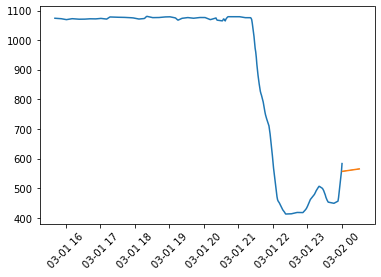

In [29]:
# zobrazujmy jak wyglada predykcja na kolejny okres
plt.plot(data['Timestamp'][-500:],data['power'][-500:])
plt.plot(zakres_dat,pd.Series(prognoza))
plt.fill_between(zakres_dat, pd.Series(prognoza)+blad, pd.Series(prognoza)-blad)
_= plt.xticks(rotation = 45)